Основная часть

    Попробовать построить все графики из тех, что были на уроке по Seaborn
    Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

Дополнительная часть

    Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

    Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

    Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

Описания полей

    age возраст

    gender пол repexc_date

    city_type Тип города проживания клиента

    full_mob Длительность взаимоотношений с банком

    ml_balance ипотека

    cl_balance_0m потребительский кредит

    loan_balance_0m все кредиты

    td_balance_0m депозит

    casa_balance_0m счета

    dc_trx_cnt количество трат по картам

    dc_trx_sum сумма трат по картам

    Avg_trx средний размер транзакции

    avgtrx_to_balance

    min_casa_balance_1q показатели по счетам за квартал

    max_casa_balance_1q

    avg_casa_balance_1Y показатели по счетам за год

    min_td_balance_1q

    max_td_balance_1q

    avg_td_balance_1Y

    min_loan_balance_1q

    max_loan_balance_1q

    avg_loan_balance_1Y

    min_cl_balance_1q

    max_cl_balance_1q

    avg_cl_balance_1Y

    loan_to_deposit

    income доход клиента

    nbi доход от клиента без OPEX



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving test_cluster.csv to test_cluster (1).csv


In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,0.00,0.00,0.0000,0.0000,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,0.00,0.00,3272.9367,4280.1960,4716.127317,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,5128.02,0.00,6249.7550,10311.6588,10239.601283,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,0.00,0.00,14354.9370,15086.7999,13905.841283,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,0.00,0.00,91511.7691,93649.4406,96089.612758,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,0.00,0.00,0.8800,0.8800,2003.093333,1247018.0,1247018.0,1325809.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,0.00,0.00,0.0000,0.0000,0.000000,1000000.0,1000000.0,1000000.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,118358.38,12405.50,3795.8800,7544.1900,9010.019167,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128711
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,0.00,0.00,3078.0000,4101.1200,3787.540000,0.0,0.0,0.0,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269


In [3]:
# получила информацию по датафрейму

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [4]:
# проверила на количество пропусков, много пропусков в колонках loan_to_deposit avgtrx_to_balance

for col in df.columns:
  print(col, round(df[col].isna().sum() / df.shape[0] *100,2)) 

age 0.0
gender 1.45
city_type 0.0
full_mob 0.0
ml_balance 0.0
cl_balance_0m 0.0
loan_balance_0m 0.0
td_balance_0m 0.0
casa_balance_0m 0.0
dc_trx_cnt 0.0
dc_trx_sum 0.0
income 0.0
min_casa_balance_1q 0.0
max_casa_balance_1q 0.0
avg_casa_balance_1Y 0.0
min_td_balance_1q 0.0
max_td_balance_1q 0.0
avg_td_balance_1Y 0.0
min_loan_balance_1q 0.0
max_loan_balance_1q 0.0
avg_loan_balance_1Y 0.0
min_cl_balance_1q 0.0
max_cl_balance_1q 0.0
avg_cl_balance_1Y 0.0
loan_to_deposit 92.36
Avg_trx 35.74
avgtrx_to_balance 36.97
nbi 4.86


In [5]:
# удалила пропуски

df2 = df.dropna()
df2

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
10,56,F,<100,165,0.0,0.0,61189.99,70000.0,1.524580e+03,341,4.514815e+05,36694.37,1.470560e+03,1.545220e+03,5.844510e+03,70000.0,70000.0,7.000000e+04,44360.86,61189.99,43218.413333,0.0,0.0,0.0,0.617406,1323.992698,0.226536,8009.940315
29,53,F,1M+,50,0.0,0.0,0.00,0.0,0.000000e+00,15,9.922944e+04,0.00,0.000000e+00,4.133828e+04,1.270331e+04,0.0,1385000.0,1.269583e+06,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,6615.296000,0.520754,28503.869696
242,41,М,Mega,94,0.0,0.0,0.00,900000.0,1.620503e+04,3,1.884000e+04,0.00,1.575165e+04,2.079461e+04,6.639694e+03,900000.0,900000.0,8.737500e+05,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,6280.000000,0.945827,14333.600182
385,57,М,Mega,167,0.0,0.0,0.00,0.0,4.400953e+05,183,4.929067e+05,0.00,2.653532e+05,4.400953e+05,2.921175e+05,0.0,250000.0,2.291667e+05,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,2693.479344,0.009221,30007.498843
416,62,F,<100,16,0.0,0.0,0.00,0.0,3.202378e+05,4,1.016683e+05,0.00,1.525000e+02,3.451525e+05,6.403842e+04,0.0,0.0,1.601513e+05,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,25417.080000,0.396904,34956.302433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49914,55,F,Mega,81,0.0,0.0,0.00,500000.0,1.780180e+07,39,6.158742e+05,0.00,1.780180e+07,1.882378e+07,1.662268e+07,500000.0,500000.0,5.000000e+05,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,15791.646092,0.000950,307575.901720
49924,64,М,Mega,11,0.0,0.0,0.00,3200000.0,3.369764e+06,24,1.529067e+05,0.00,5.473840e+05,6.071044e+06,1.033688e+06,3200000.0,3200000.0,3.200000e+06,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,6371.111842,0.006163,78593.716197
49941,29,F,<100,17,0.0,0.0,61265.49,0.0,8.522300e+02,748,1.475056e+06,156600.00,8.437500e+02,8.522300e+02,5.970454e+04,0.0,0.0,8.750000e+02,33551.88,182674.67,37271.382500,0.0,0.0,0.0,42.595866,1972.000591,0.033029,59325.288820
49942,61,F,<100,123,0.0,0.0,0.00,1500000.0,8.399308e+05,2,1.000000e+05,156343.62,3.893664e+05,8.399308e+05,9.166790e+05,1500000.0,1500000.0,1.500000e+06,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,50000.000000,0.054545,66137.407059


In [6]:
# сгруппировала по возрасту

df1 = df.groupby('age').mean()
df1

,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
age,,,,,,,,,,,,,,,,,,,,,,,,,
4,2.000000,0.0,0.0,0.0,0.000000,4.075974e+04,0.000000,0.00,0.000000,0.000000e+00,4.075974e+04,1.358658e+04,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,79.627151
8,5.000000,0.0,0.0,0.0,0.000000,3.202569e+06,0.000000,0.00,0.000000,1.355690e+05,3.213679e+06,2.105148e+06,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,36406.273947
9,6.000000,0.0,0.0,0.0,0.000000,2.103752e+06,0.000000,0.00,0.000000,1.441865e+06,2.103752e+06,1.129787e+06,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,15130.725813
10,63.000000,0.0,0.0,0.0,0.000000,1.764209e+05,0.000000,0.00,6650.000000,1.624340e+05,1.764209e+05,1.379963e+05,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7377.322777
13,9.000000,0.0,0.0,0.0,0.000000,2.422594e+05,0.000000,0.00,16936.260000,2.071923e+05,2.422594e+05,1.211670e+05,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7914.083819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,68.600000,0.0,0.0,0.0,601114.848900,3.820112e+04,14.200000,12433.94,1015.334000,3.819885e+04,3.921419e+04,3.552821e+04,601114.8489,610990.664200,596980.329658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,875.629577,0.284831,11664.455638
89,63.666667,0.0,0.0,0.0,0.000000,1.147067e+04,9.333333,4999.29,353.811667,1.145353e+04,1.338646e+04,1.343380e+04,0.0000,0.000000,266666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,535.638214,0.055569,5022.868030
90,65.000000,0.0,0.0,0.0,371206.693333,1.400000e-01,0.000000,0.00,0.000000,1.400000e-01,1.400000e-01,3.444845e+03,371203.7400,371206.693333,666041.663333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7698.325985


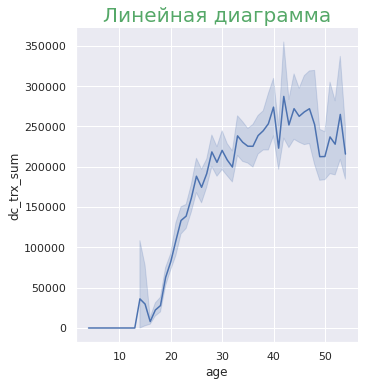

In [7]:

sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='dc_trx_sum', 
    data=df.query("age < 55"), 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

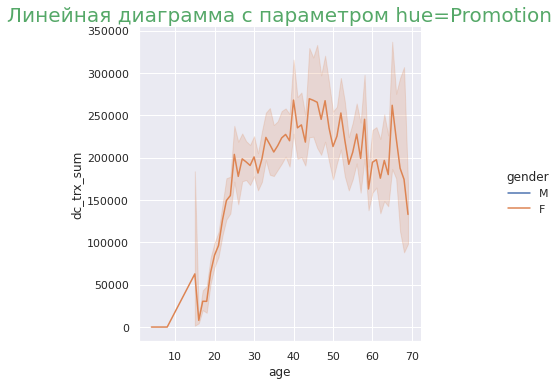

In [8]:
sns.relplot(x='age',
            y='dc_trx_sum',
            hue='gender',
            hue_order=["M", "F"],
            data=df.query("age < 70"), kind='line')
plt.title('Линейная диаграмма c параметром hue=Promotion', size=20, color='g');

Text(25.518162500000003, 0.5, 'ипотека')

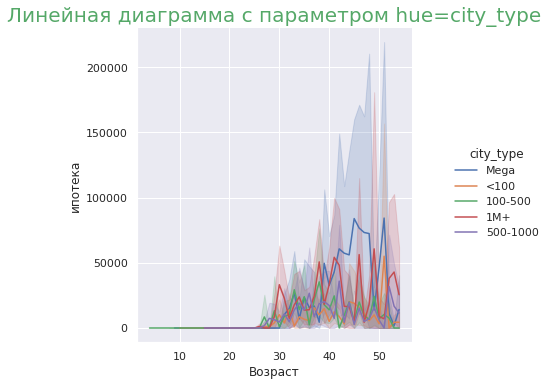

In [9]:
sns.relplot(x='age', y='ml_balance', hue='city_type', data=df.query("age<55"), kind='line')
plt.title('Линейная диаграмма c параметром hue=city_type', size=20, color='g')
plt.xlabel('Возраст')
plt.ylabel('ипотека')

Text(0.5, 1.0, 'Линейная диаграмма с разбивкой по городам  стиль, bar')

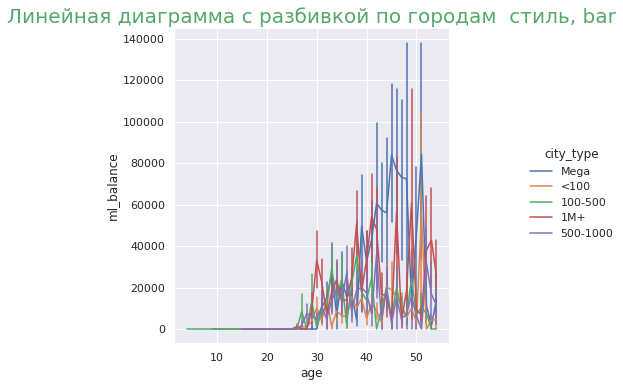

In [10]:
sns.relplot(x='age', y='ml_balance', hue='city_type',
            data=df.query("age<55"), kind='line', err_style="bars", ci=68)
plt.title('Линейная диаграмма с разбивкой по городам  стиль, bar', size=20, color='g')

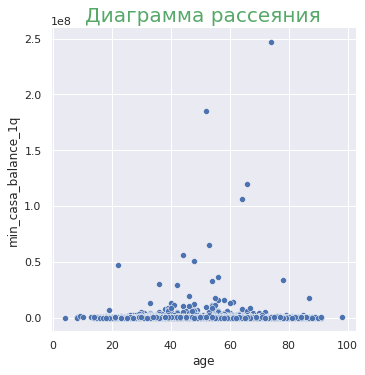

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(
    x='age',
    y='min_casa_balance_1q',
    data=df
)
plt.title('Диаграмма рассеяния', size=20, color='g');

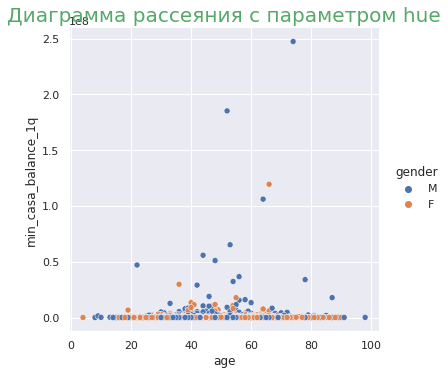

In [12]:

sns.relplot(
    x='age', 
    y='min_casa_balance_1q', 
    hue='gender', 
    data=df)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

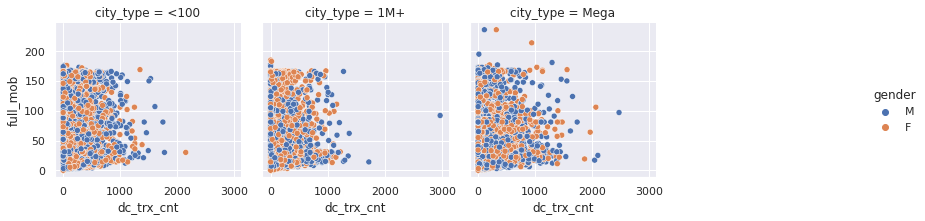

In [13]:
city = ['<100', '1M+', 'Mega']
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='gender',
    col='city_type',
    col_wrap=4,
    col_order=city,
    data=df,
    height=3
)

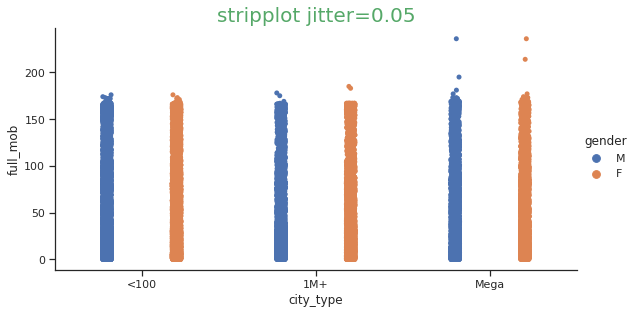

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

city = ['<100', '1M+', 'Mega']
sns.catplot(
    x='city_type',
    y='full_mob', 
    data=df, 
    hue='gender',   
    order=city, 
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 

plt.title('stripplot jitter=0.05', size=20, color='g');

KeyboardInterrupt: ignored

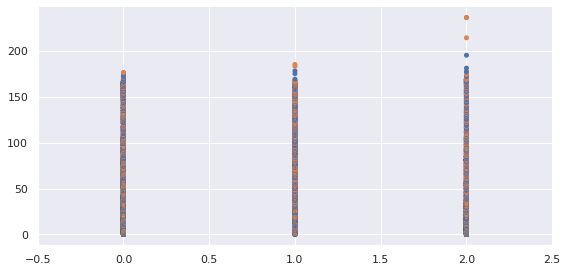

In [18]:
sns.catplot(
    x='city_type',
    y='full_mob', 
    data=df, 
    order=city, 
    hue='gender',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

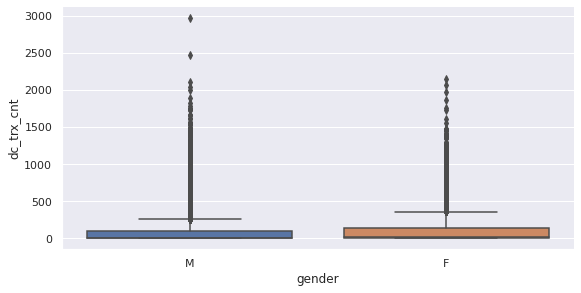

In [17]:
sns.set(style='darkgrid')
city = ['<100', '1M+', 'Mega']
sns.catplot(
    x='gender', 
    y='dc_trx_cnt', 
    data=df, 
    kind='box', 
    height=4, 
    aspect=2
);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


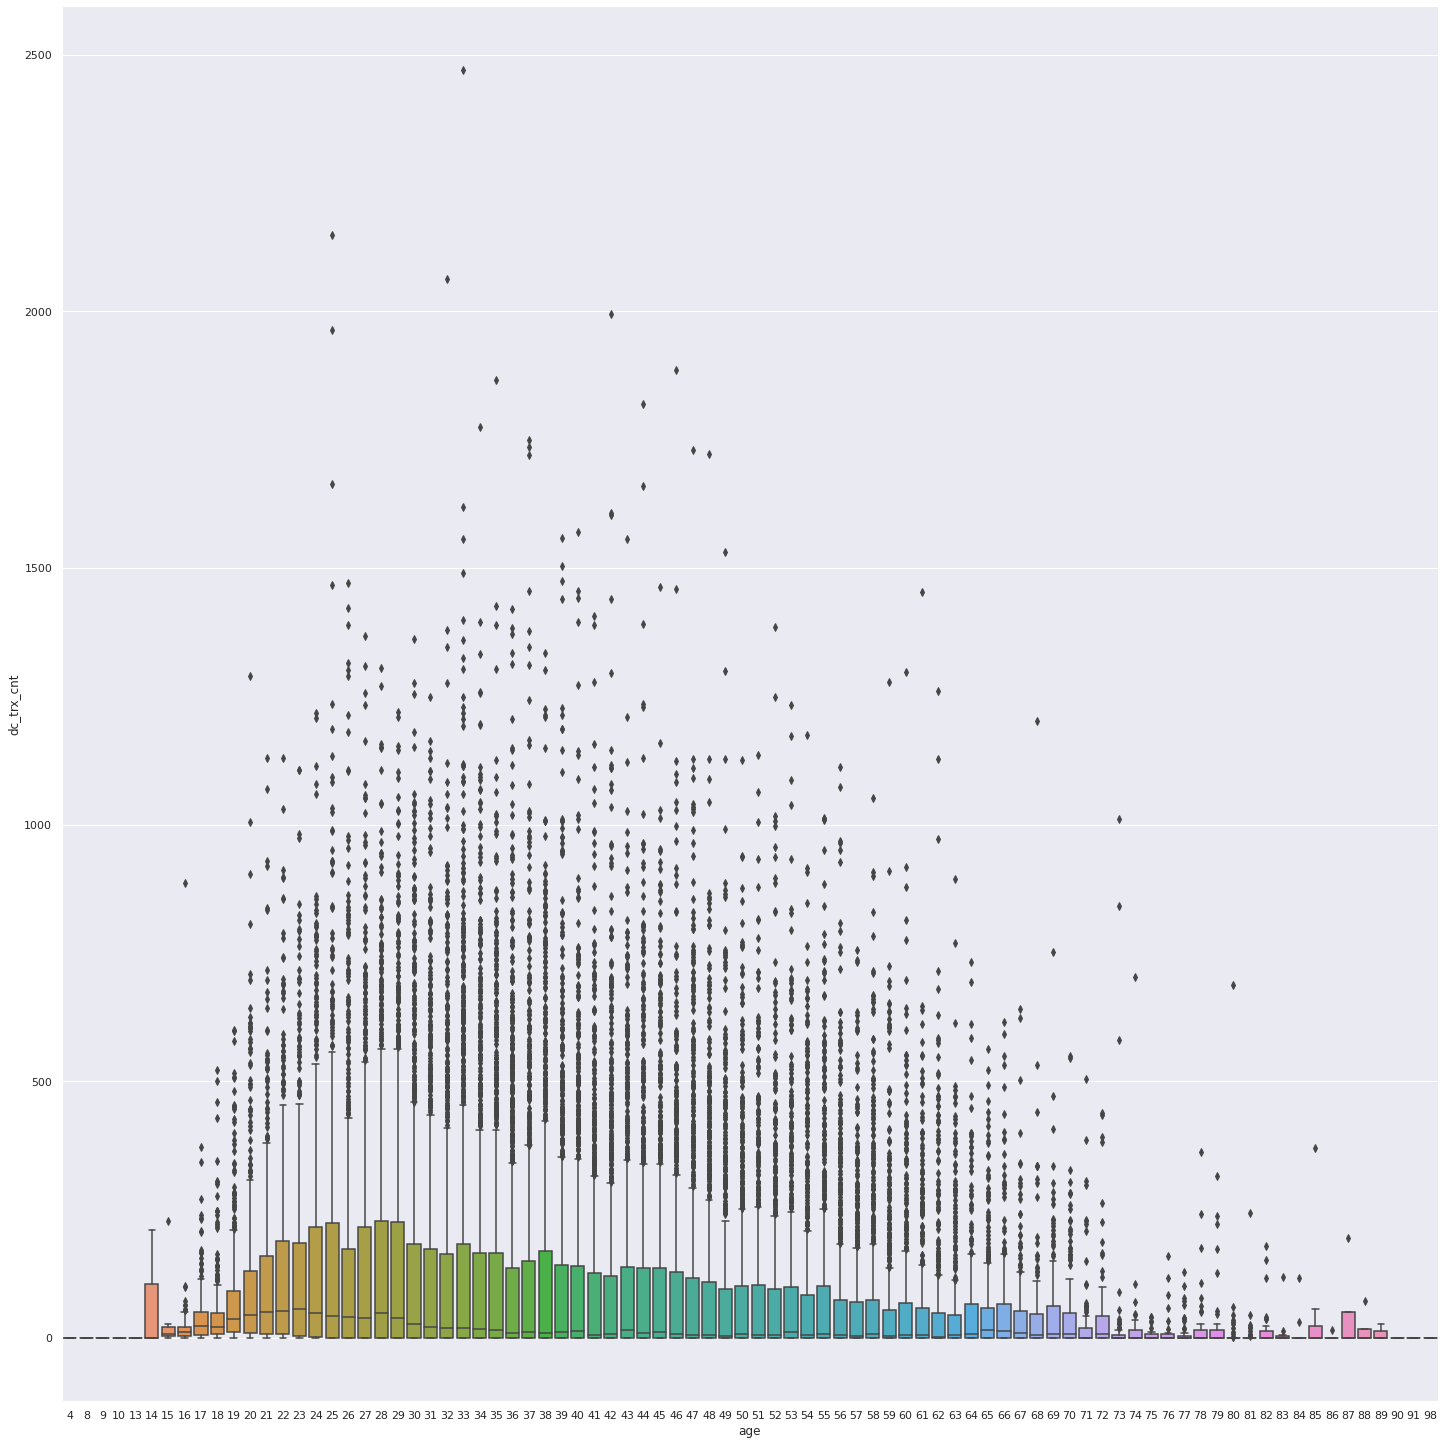

In [21]:
sns.catplot(x='age', y='dc_trx_cnt',data=df.query('nbi<100000'), kind="box", size=20);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


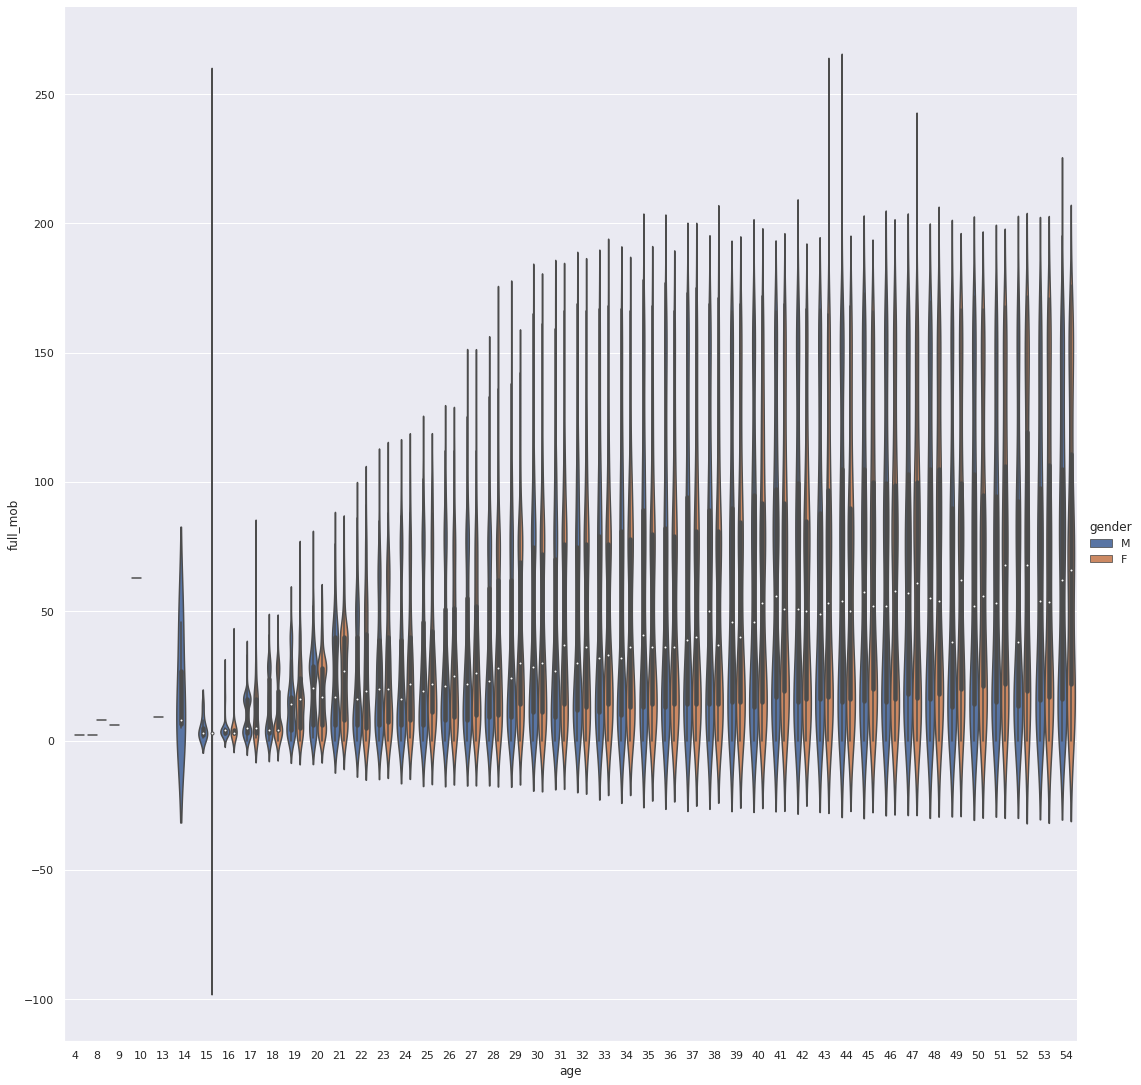

In [22]:
g = sns.catplot(x="age", y="full_mob", kind="violin", hue='gender', data=df.query("age<55"), size=15);